In [ ]:
%reset -f

In [ ]:
import keras

In [ ]:
from matplotlib.pyplot import imread,imshow
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.utils import shuffle
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
import numpy as np
import pandas as pd
import glob
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50

Importing Google Drive to get Dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Splitting Training and Test data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#splits data into training and testing(validation) sets
train_datagen =ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.25)

train_generator = train_datagen.flow_from_directory(
        '/gdrive/MyDrive/datasets/The IQ-OTHNCCD lung cancer dataset/',  # Source directory
        target_size=(512, 512),  # Resizes images
        batch_size=12,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'rgb')

epochs = 12
#Testing data
validation_generator = train_datagen.flow_from_directory(
        '/gdrive/MyDrive/datasets/The IQ-OTHNCCD lung cancer dataset/',
        target_size=(512, 512),
        class_mode='categorical',
        subset='validation',
        color_mode = 'rgb'
    ) # set as validation data

Found 823 images belonging to 3 classes.
Found 274 images belonging to 3 classes.


In [ ]:
validation_generator_2 = train_datagen.flow_from_directory(
    '/gdrive/MyDrive/datasets/The IQ-OTHNCCD lung cancer dataset/',
    target_size=(512, 512),
    batch_size=4,
    class_mode='categorical',
    subset='validation',
    color_mode = 'grayscale') # set as validation data

Found 274 images belonging to 3 classes.


In [ ]:
input_ = (512,512,3)
n_classes=3
batchsize = 12
epochs = 12
#796/12 = 67
# 12

# Resnet

In [ ]:
resnet = ResNet50(weights='imagenet',
                      input_shape= (512,512,3),
                      include_top= False)  


#show the base model summary 
resnet.summary()
#show how manay layers in the Resnet Network
layers = resnet.layers
print(f'Number of Layers: {len(layers)} ')

In [ ]:
size_train = 823
size_val = 274
batch_size = 65
epochs = 12
# early stopping 
callbacks = EarlyStopping(patience = 3, monitor='val_accuracy')
                        
# let's train our Model 
inputs = resnet.input
# add an average pooling layer
x = resnet.output
x = GlobalAveragePooling2D()(x)
#first dense layer
x = Dense(512, activation='relu')(x)
#dropout 
x = Dropout(0.5)(x)
# output layer
outputs = Dense(3, activation ='softmax')(x)
# this is the model we will train
#base = Model(inputs=inputs, outputs=outputs)
#base.load_weights(weights_path)
model = Model(inputs=inputs, outputs=outputs)

# freeze all convolutional Resnet layers
for layer in layers:
    layer.trainable = False
# compile the model 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# train the model on the new data for a few epochs
history = model.fit(
    train_generator,
    epochs= 12,
    validation_data = validation_generator,
    #validation_steps = size_val//batch_size,
    steps_per_epoch = 65,
    verbose =1
)

Epoch 1/12
65/65 [==============================] - 329s 4s/step - loss: 1.5658 - accuracy: 0.4658 - val_loss: 0.9085 - val_accuracy: 0.5620
Epoch 2/12
65/65 [==============================] - 77s 1s/step - loss: 0.9806 - accuracy: 0.5006 - val_loss: 0.9134 - val_accuracy: 0.6825
Epoch 3/12
65/65 [==============================] - 72s 1s/step - loss: 0.9568 - accuracy: 0.5161 - val_loss: 0.9132 - val_accuracy: 0.5547
Epoch 4/12
65/65 [==============================] - 72s 1s/step - loss: 0.9656 - accuracy: 0.5359 - val_loss: 0.9414 - val_accuracy: 0.6934
Epoch 5/12
65/65 [==============================] - 71s 1s/step - loss: 0.9675 - accuracy: 0.5316 - val_loss: 0.9056 - val_accuracy: 0.5547
Epoch 6/12
65/65 [==============================] - 71s 1s/step - loss: 0.9374 - accuracy: 0.5548 - val_loss: 0.9261 - val_accuracy: 0.5438
Epoch 7/12
65/65 [==============================] - 71s 1s/step - loss: 0.9425 - accuracy: 0.5355 - val_loss: 0.9161 - val_accuracy: 0.5255
Epoch 8/12
65/65 [=

# 5- Conv layer CNN model

Reading & loading image data into numpy arrays



```
# This is formatted as code
```

bengin = 0, malignant = 1 , normal = 2

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(16, (3, 3), activation="relu", input_shape=input_))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = n_classes))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0

In [ ]:
 history2 = cnn.fit(
      train_generator,
      steps_per_epoch=65,
      epochs=12,
      validation_data = validation_generator,
      #validation_steps = 12,
      #callbacks = callbacks_list,
      verbose=1)

Epoch 1/12
65/65 [==============================] - 379s 6s/step - loss: 0.9889 - accuracy: 0.4684 - val_loss: 0.9674 - val_accuracy: 0.5109
Epoch 2/12
65/65 [==============================] - 231s 4s/step - loss: 0.9580 - accuracy: 0.5084 - val_loss: 0.9337 - val_accuracy: 0.5109
Epoch 3/12
65/65 [==============================] - 234s 4s/step - loss: 0.9000 - accuracy: 0.5626 - val_loss: 0.9177 - val_accuracy: 0.5401
Epoch 4/12
65/65 [==============================] - 232s 4s/step - loss: 0.8873 - accuracy: 0.5755 - val_loss: 0.8075 - val_accuracy: 0.6715
Epoch 5/12
47/65 [====================>.........] - ETA: 55s - loss: 0.7800 - accuracy: 0.6826

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

#This code is used to plot the training and validation accuracy
epochs_range2 = range(len(val_loss2))#range(epochs)
print(epochs_range2)

range(0, 12)


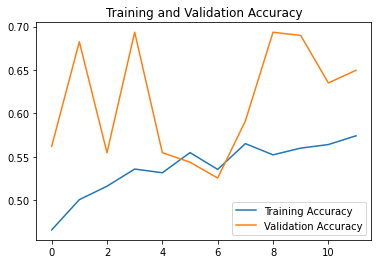

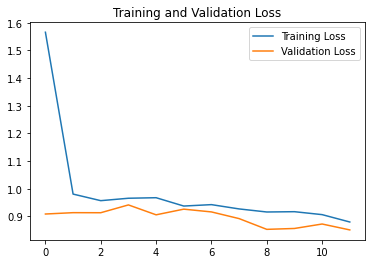

Training Accuracy:
0.57419353723526
Testing Accuracy:
0.6496350169181824


(None, None)

In [ ]:
#plt.figure()
#plt.subplot(1, 2, 1)
plt.plot(epochs_range2, acc2, label='Training Accuracy')
plt.plot(epochs_range2, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range2, loss2, label='Training Loss')
plt.plot(epochs_range2, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# returns accuracy of training
print("Training Accuracy:"), print(history2.history['accuracy'][-1])
print("Testing Accuracy:"), print (history2.history['val_accuracy'][-1])

In [ ]:
evaluation=cnn.evaluate(validation_generator_2,verbose=1)

9/9 [==============================] - 8s 820ms/step - loss: 0.7679 - accuracy: 0.7664


In [ ]:
print('Test dataset loss:', evaluation[0])
print('Test dataset accuracy:', evaluation[1]*100,"%")

Test dataset loss: 0.7678946256637573
Test dataset accuracy: 76.64233446121216 %


In [ ]:
cnn.save('./../gdrive/MyDrive/datasets/lung_train_cnn.h5')
model.save('./../gdrive/MyDrive/datasets/lung_train_resnet.h5')

# Localisation

# Grad-CAM class activation visualization

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2020/04/26<br>
**Last modified:** 2021/03/07<br>
**Description:** How to obtain a class activation heatmap for an image classification model.

Adapted from Deep Learning with Python (2017).
## Setup

In [ ]:
%reset -f

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential, save_model, load_model, Model

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import glob

## Configurable parameters

You can change these to another model.

To get the values for `last_conv_layer_name` use `model.summary()`
to see the names of all layers in the model.

In [ ]:
model_builder = keras.applications.xception.Xception

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


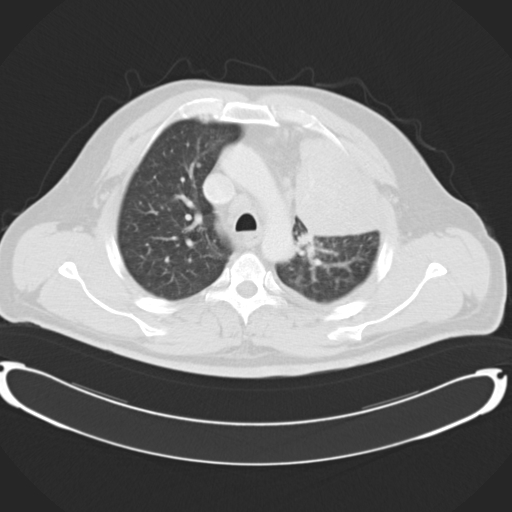

In [ ]:
malignant_list = glob.glob("/content/drive/MyDrive/datasets/The IQ-OTHNCCD lung cancer dataset/Malignant cases/*.jpg")
normal_list = glob.glob("/content/drive/MyDrive/datasets/The IQ-OTHNCCD lung cancer dataset/Normal cases/*.jpg")
img_path = malignant_list[400]

model_builder = keras.applications.xception.Xception
img_size = (512, 512)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_46"

# The local path to our target image

display(Image(img_path))


## The Grad-CAM algorithm

In [ ]:
from tensorflow.keras import backend as K

In [ ]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size, color_mode = 'rgb')
    #img = tf.image.rgb_to_grayscale(img)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        #loss = preds[:, np.argmax(preds[0])] #1
        #grads = tape.gradient(loss, last_conv_layer_output) #2
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
        #pooled_grads = K.mean(grads, axis=(0,1,2)) #3

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    #heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)#4
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    #heatmap = np.maximum(heatmap, 0)
    #max_heat = np.max(heatmap)
    #if max_heat == 0:
    #  max_heat = 1e-10
    #heatmap /= max_heat

    #print(heatmap.shape)
    return heatmap


## Let's test-drive it

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *

In [ ]:
flag = True
if (input("Enter resnet or 5Conv:") == "resnet"):
  flag = False
  resnet = ResNet50(weights='imagenet',
                        input_shape= (512,512,3),
                        include_top= False)

  layers = resnet.layers

  size_train = 823
  size_val = 274
  batch_size = 65
  epochs = 12
  # early stopping 

  # let's train our Model 
  inputs = resnet.input
  # add an average pooling layer
  x = resnet.output
  x = GlobalAveragePooling2D()(x)
  #first dense layer
  x = Dense(512, activation='relu')(x)
  #dropout 
  x = Dropout(0.5)(x)
  # output layer
  outputs = Dense(3, activation ='softmax')(x)
  # this is the model we will train
  #base = Model(inputs=inputs, outputs=outputs)
  #base.load_weights(weights_path)
  model = Model(inputs=inputs, outputs=outputs)

  # freeze all convolutional Resnet layers
  for layer in layers:
      layer.trainable = False
  # compile the model 
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  model.load_weights('/content/drive/MyDrive/datasets/resnet_lung_train_1.h5')
  model.summary()

[[-1.1781836  -1.7356842   0.49365982]]


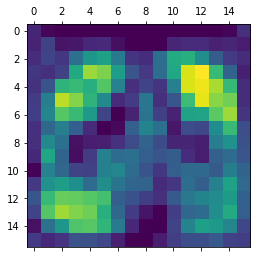

In [ ]:
#layer name
last_conv_layer_name = "conv5_block3_1_conv"

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=(512,512)))

# Make model
if flag:
  model = keras.models.load_model('/content/drive/MyDrive/datasets/22_22_lung_train_5conv.h5', compile=True)

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
#print("Predicted:", decode_predictions(preds, top=1)[0])
print(preds)
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
#hh = np.reshape(heatmap, (28,28))
plt.matshow(heatmap)
plt.show()

## Create a superimposed visualization

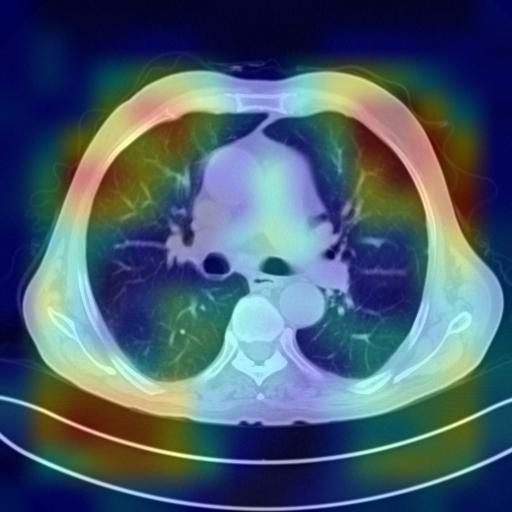

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

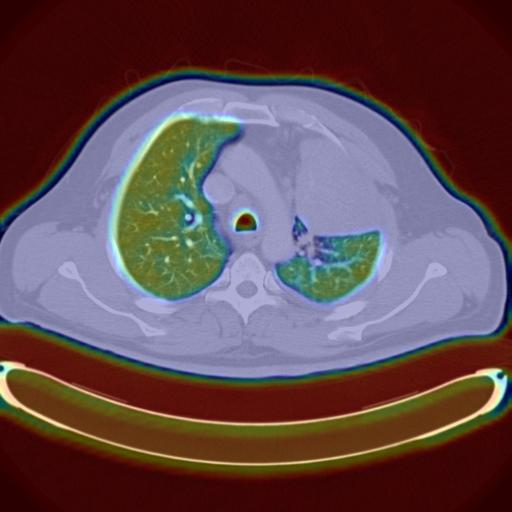

In [ ]:
save_and_display_gradcam(img_path, heatmap)


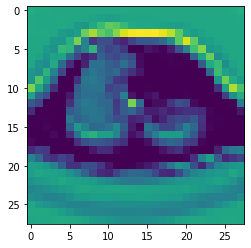

In [ ]:
plt.imshow(heatmap)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 510, 510, 16)      160       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 255, 255, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 62, 62, 32)     

## Let's try another image

We will see how the grad cam explains the model's outputs for a multi-label image. Let's
try an image with a cat and a dog together, and see how the grad cam behaves.

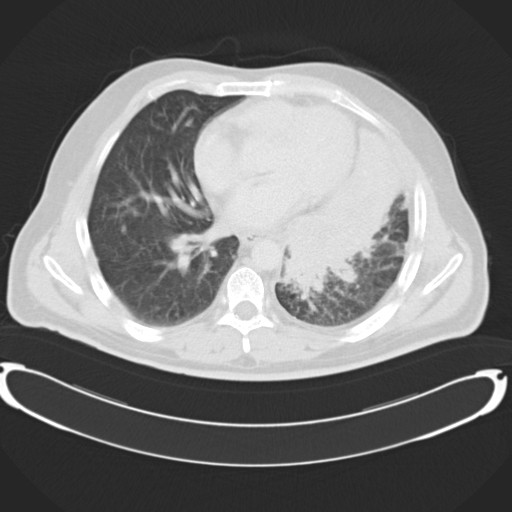

In [ ]:
display(Image(malignant_list[509]))

In [ ]:
print(img_path)

/content/drive/MyDrive/datasets/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (514).jpg


[[-1.1781836  -1.7356842   0.49365982]]


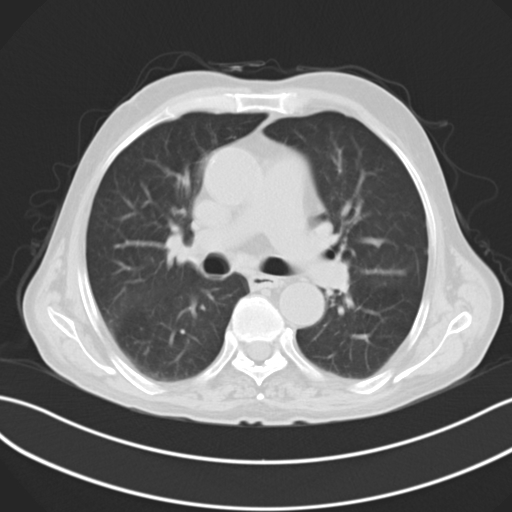

[[-1.1781836  -1.7356842   0.49365982]]


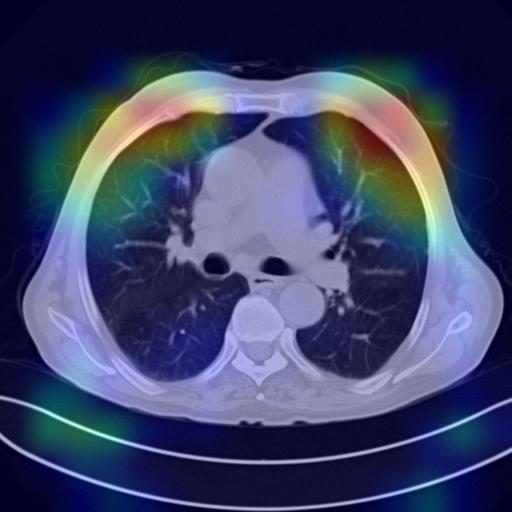

In [ ]:
img_path = malignant_list[50]

img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
print(preds)

display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
print(preds)
#print("Predicted:", decode_predictions(preds)[0])

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam(img_path, heatmap)

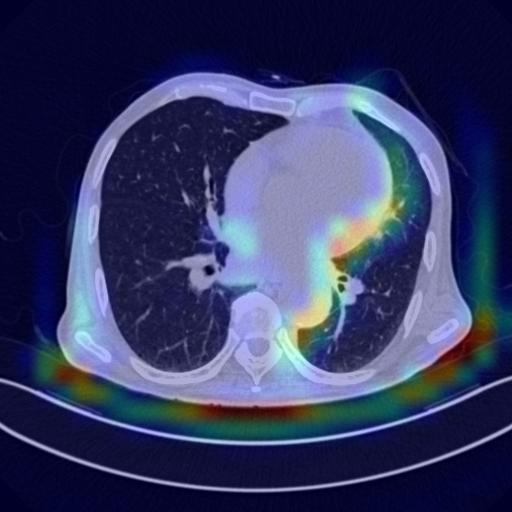

In [ ]:
img_path = malignant_list[300]
img_array = preprocess_input(get_img_array(img_path, size=img_size))

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam(img_path, heatmap)